In [1]:
    
from BobSARIMAX import BobSARIMAX
import numpy as np

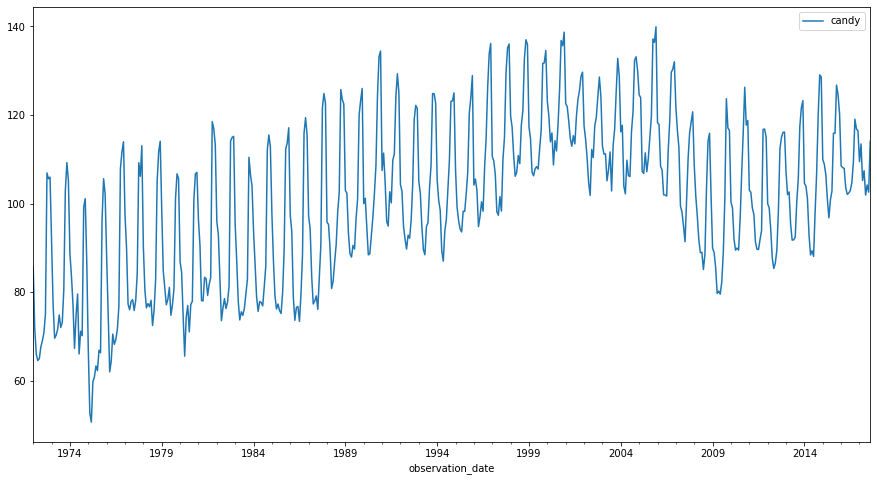

In [2]:
import pandas as pd

df = pd.read_csv("candy_production.csv")

df.observation_date = pd.to_datetime(df.observation_date)
df = df.set_index(df.observation_date)
df = df.drop(["observation_date"],axis=1)

df.columns = ["candy"]

df.plot(figsize=(15,8))

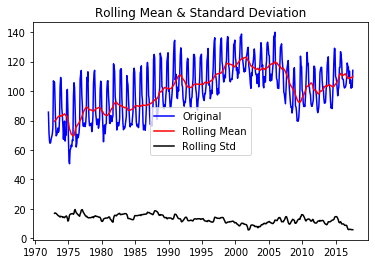

Test Statistic                  -1.887050
p-value                          0.338178
#Lags Used                      14.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.442678
Critical Value (5%)             -2.866978
Critical Value (10%)            -2.569666
dtype: float64


In [3]:

tool = BobSARIMAX(df,0,12)

tool.test_stationarity(df,"candy",12)


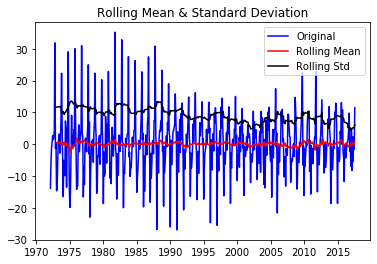

Test Statistic                -6.119512e+00
p-value                        8.925584e-08
#Lags Used                     1.300000e+01
Number of Observations Used    5.330000e+02
Critical Value (1%)           -3.442678e+00
Critical Value (5%)           -2.866978e+00
Critical Value (10%)          -2.569666e+00
dtype: float64


In [4]:
tool.test_stationarity(df.diff().dropna(),"candy",12)

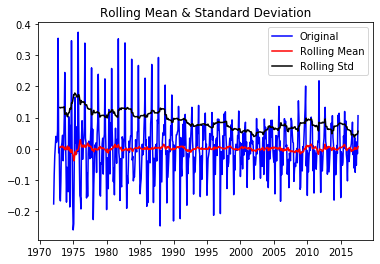

Test Statistic                -6.391158e+00
p-value                        2.104306e-08
#Lags Used                     1.400000e+01
Number of Observations Used    5.320000e+02
Critical Value (1%)           -3.442702e+00
Critical Value (5%)           -2.866988e+00
Critical Value (10%)          -2.569672e+00
dtype: float64


In [5]:
tool.test_stationarity(np.log(df).diff().dropna(),"candy",12)

In [6]:
## we probably dont need log

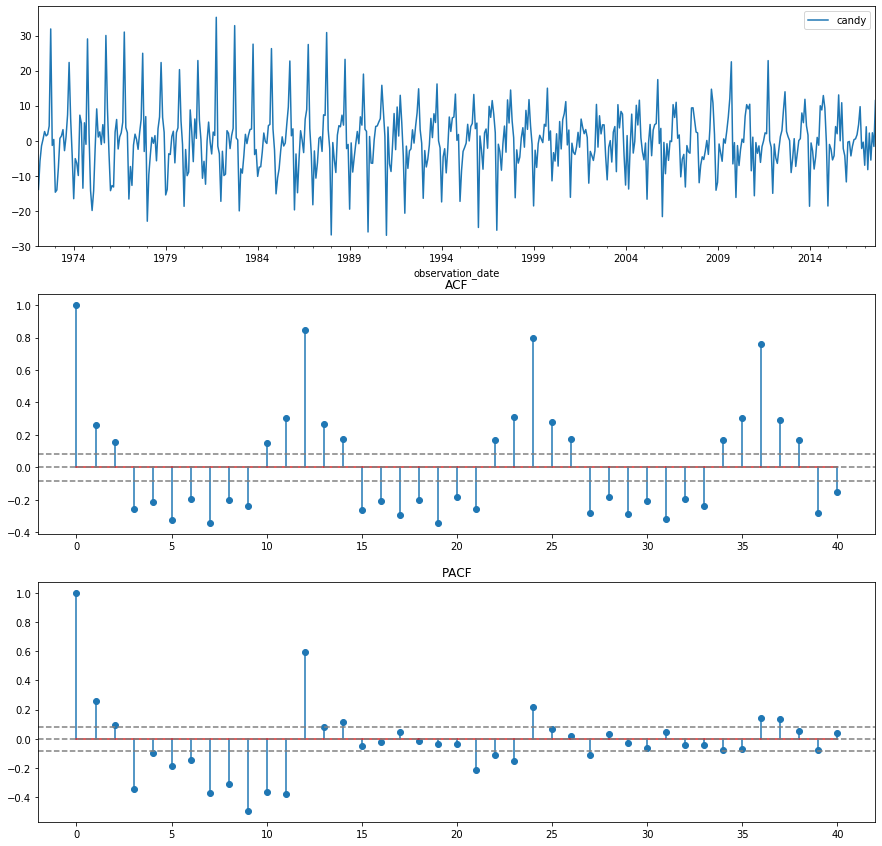

In [7]:
tool.plots(df.diff().dropna())

Best transformation: 2 with p-value 2.1043064679836375e-08
Overwrite with set transformation: 1
Suggested p: 1 q: 1 s: 12
Run grid search...
to test 324 combinations...
Grid Searching... 97.83 %  Remaining Seconds 140Optimal SARIMA Model found!
Model set: order=(0,1,2), seasonal_order=(0,1,2,12)


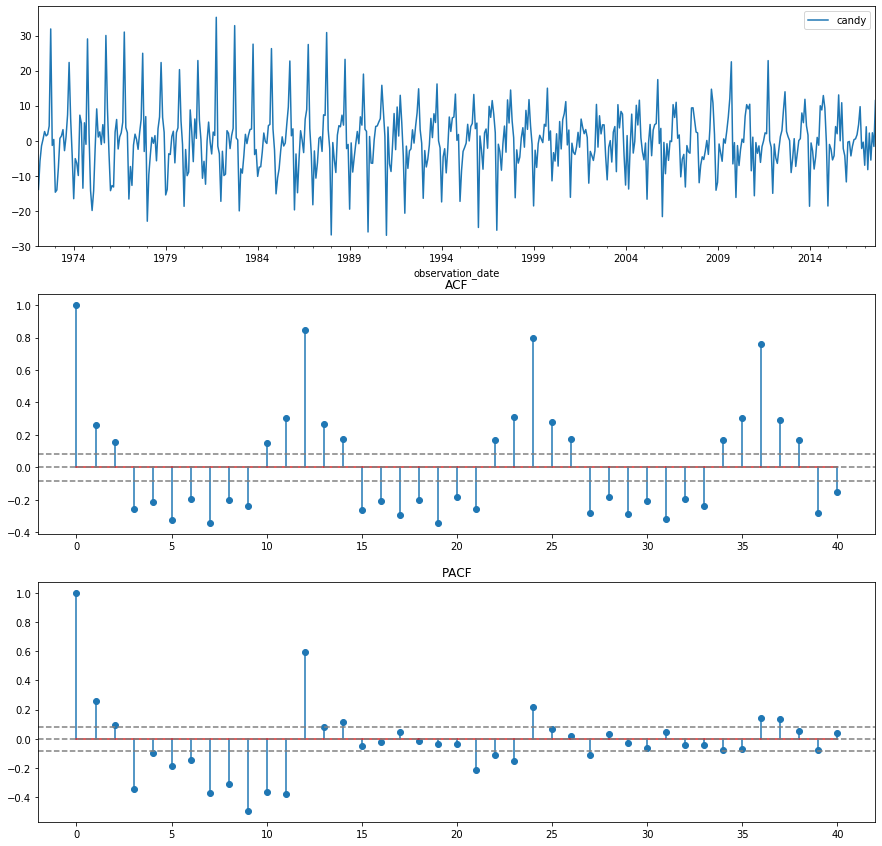

In [8]:
tool.automode(12, adfuller_treshhold = 0.05, forcemode = 1)

# Model set: order=(0,1,2), seasonal_order=(0,1,2,12)

In [12]:
tool.fit()

3-days RMSE: 3.512006092222766 [8.913324016827513, 2.924245050033613, 2.726016098724909, 1.6615979633472389, 1.3348473321805543]
6-days RMSE: 5.134109738623137 [10.75821619092945, 3.339430544378709, 3.8930700331055266, 3.6582911972806547, 4.02154072742135]
all-days RMSE: 10.966376113075624 [9.625747508055618, 8.633933960062338, 13.56895397414165, 11.433865632890086, 11.569379490228435]


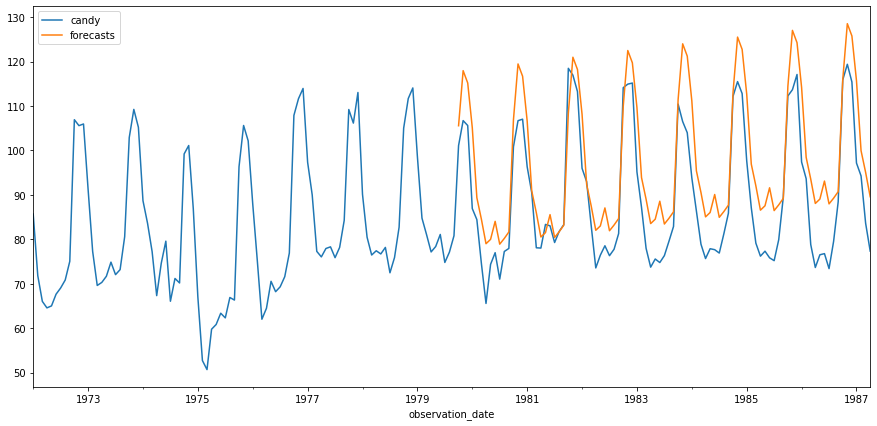

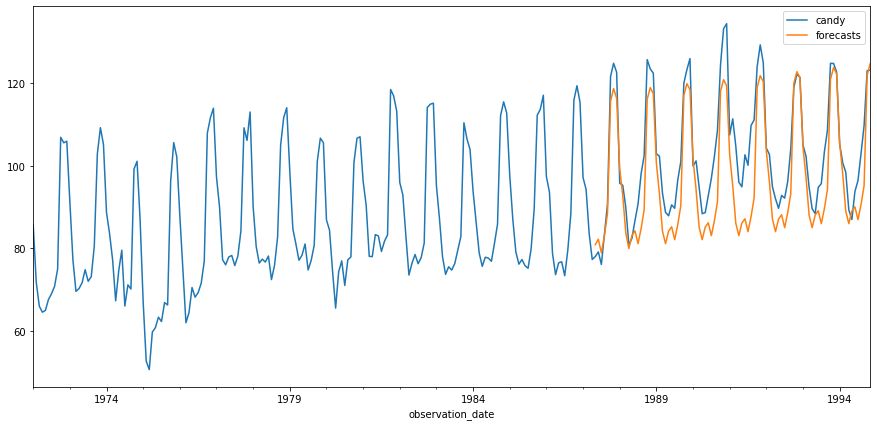

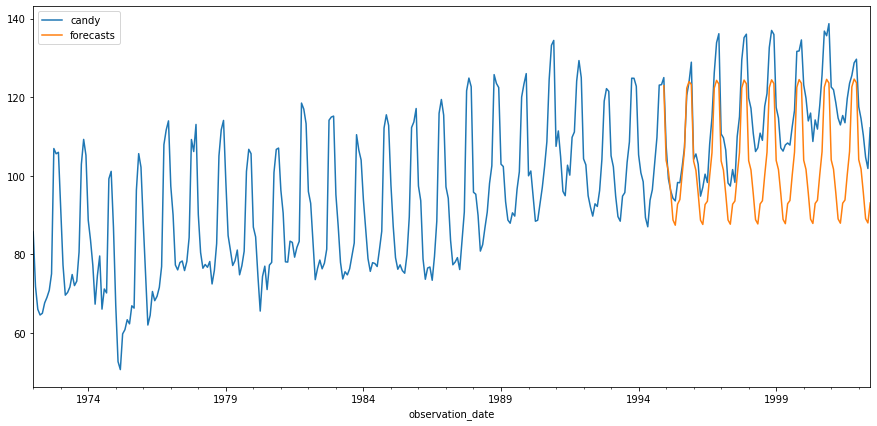

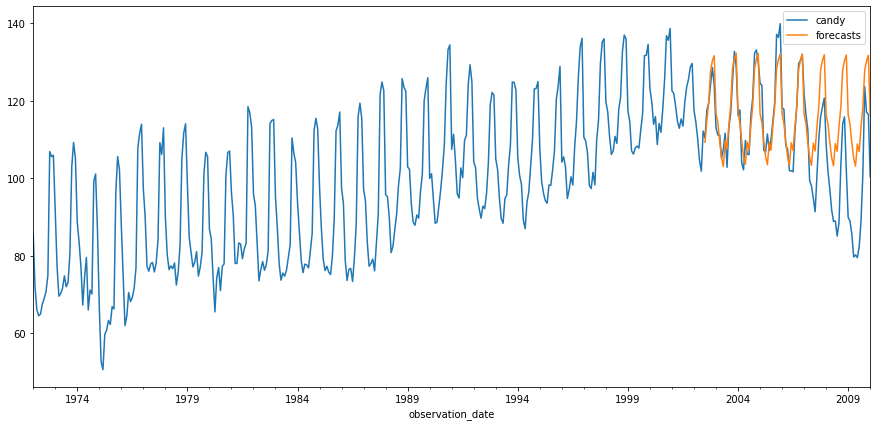

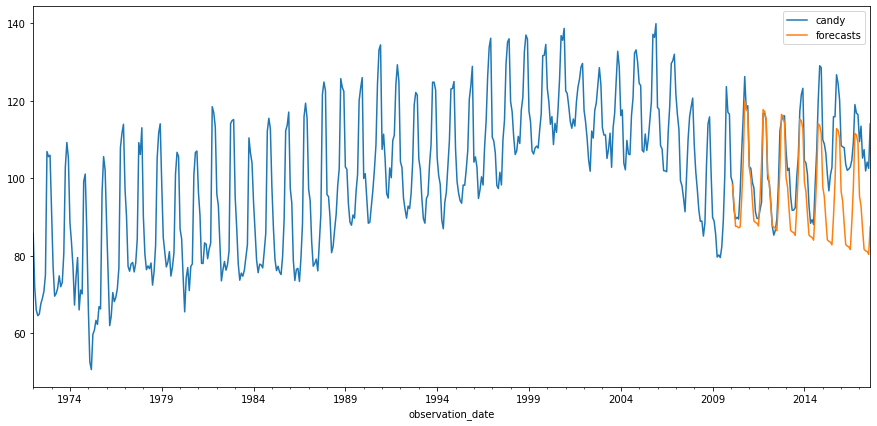

In [16]:
tool.cross_val_score()